Importing libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn import cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
from pylab import savefig
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Reading the dataset

In [ ]:
dataset = pd.read_csv('NewsArticles.csv',encoding='unicode escape')
dataset = dataset.drop(columns=['Unnamed: 0'])

Getting first five rows of the dataset

In [ ]:
dataset.head()

,Headlines,Sources,Source_code
0,Pakistan FM Shah Mahmood Qureshi refuses to an...,Op India,OpIndia
1,Coronavirus: Liberal privilege that sank Keral...,Op India,OpIndia
2,"BLM, Capitol Hill riots, Alexei Navalny and cy...",Op India,OpIndia
3,"How Muslims made Periyar bend a knee, while he...",Op India,OpIndia
4,Pinarayi Vijayan is main accused in 1969 RSS w...,Op India,OpIndia


creating a copy of the dataset

In [ ]:
dataset_copy = dataset.copy()

reshuffling of dataset rows

In [ ]:
dataset_copy = dataset_copy.sample(frac=1).reset_index(drop=True)

dropping rows with headlines of less than 4 words

In [ ]:
rows_to_drop = []
for i in range(0, dataset_copy.shape[0]):
    if(len(dataset_copy['Headlines'][i].split()) < 4):
        rows_to_drop.append(i)
dataset_copy = dataset_copy.drop(rows_to_drop)
dataset_copy = dataset_copy.reset_index(drop=True)

getting the number of articles published by each news source

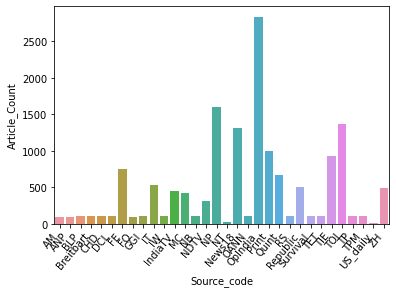

In [ ]:
news_articles_count = dataset_copy.groupby('Source_code',as_index=False).count()
news_articles_count = news_articles_count.rename(columns={'Headlines' : 'Article_Count'})
news_articles_count = news_articles_count.drop(columns='Sources')
news_articles_bar_plot = sns.barplot(x=news_articles_count['Source_code'],y=news_articles_count['Article_Count'])
news_articles_bar_plot.set_xticklabels(news_articles_bar_plot.get_xticklabels(), rotation=50, ha="right")
news_articles_code = pd.DataFrame.from_dict({'Full Name of Source':['Op India', 'Zero Hedge', 'US Daily Info', 'News Punch',
                                                                    'News Target', 'The Epoch Times', 'Right Scoop', 'News Busters',
                                                                    'Big League Politics', 'Children Health Defense', 'Breitbart',
                                                                    'Info Wars', 'All News Pipeline', 'Alt Market', 'True Pundit',
                                                                    'Survival News', 'DC Clothes Line', 'Great Game India', 'Forward Observer',
                                                                    'OANN', 'The Post Millennial', 'NDTV', 'The Quint', 'The Print',
                                                                    'India Today', 'News 18', 'Times of India', 'The Indian Express', 'Money Control',
                                                                    'Financial Express', 'Republic World', 'India TV'],
                                             'Source Code':['OpIndia', 'ZH', 'US_daily', 'NP', 'NT', 'TET', 'RS', 'NB', 'BLP',
                                                            'CHD', 'Breitbart', 'IW', 'ANP', 'AM', 'TP', 'Survival', 'DCL',
                                                            'GGI', 'FO', 'OANN', 'TPM', 'NDTV', 'Quint', 'Print', 'IT', 'News18',
                                                            'TOI', 'TIE', 'MC', 'FE', 'Republic', 'IndiaTV']})


creating corpus of words

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
corpus = []
for i in range(0,len(dataset_copy)):
    message = re.sub('[^a-zA-Z0-9]', ' ', dataset_copy['Headlines'][i])
    message = message.lower()
    message = word_tokenize(message)
    message = [lemmatizer.lemmatize(w) for w in message if not w in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)
print(corpus)

['telangana police launch qr code complaint system woman safety', 'maharashtra covid toll 1 08 lakh higher positivity rate 9 district', 'west bengal tmc panchayat pradhan threatens congress ally isf worker join party face consequence', 'du college give free vaccine general public wednesday', 'nato toughen g7 message china despite beijing cry slander', 'malta say uk decision keep island safe travel list political', 'picture show devastation caused flood amid pandemic', 'urgently trying work astrazeneca sii indian government restart covid 19 vaccine shipment official', '38 arrested far bhainsa communal violence hindu vahini telangana police', 'antifa militant attack pedestrian shut street outside denver conservative conference', 'gujarat man impersonated govt employee hurled shoe minister appointed vice president state unit aap', 'raj thackeray defies cousin uddhav mask appeal find suffocating', 'j k bjp leader rakesh pandita shot dead terrorist pulwama let front organisation claim respo

TF-IDF vectorization of words in the corpus

In [ ]:
tfidf_v = TfidfVectorizer(max_features=1000)
X = tfidf_v.fit_transform(corpus).toarray()

feature scaling X. It is must in K means classification

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Performing PCA on X

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [ ]:
pca_result

array([[-0.22560542, -1.16657457],
       [-0.41790465,  3.97677582],
       [-0.57701409, -3.68224925],
       ...,
       [-0.01912985, -0.17341565],
       [-0.0811637 , -2.00453575],
       [-0.33574396,  0.94058434]])

In [ ]:
file_name = 'pca_result.csv'
pd.DataFrame(pca_result).to_csv(file_name)

checking if there is an elbow in the Intertia vs number of clusters curve. WCSS stands for total within-cluster sum of square

Cluster 1 Intertia 94999.2068076187
Cluster 2 Intertia 48520.51686558437
Cluster 3 Intertia 27962.11393290309
Cluster 4 Intertia 19337.619146471476
Cluster 5 Intertia 13555.170700428655
Cluster 6 Intertia 10555.572560235907
Cluster 7 Intertia 8496.936740921763
Cluster 8 Intertia 6821.466768270855
Cluster 9 Intertia 5809.123001558899
Cluster 10 Intertia 4961.560075905045
Cluster 11 Intertia 4276.5481349920055
Cluster 12 Intertia 3650.464141390045
Cluster 13 Intertia 3207.6624850083494
Cluster 14 Intertia 2800.3935341554156
Cluster 15 Intertia 2496.1928956000056
Cluster 16 Intertia 2291.2364350516045
Cluster 17 Intertia 2107.7641167762476
Cluster 18 Intertia 1945.0515146180542
Cluster 19 Intertia 1815.3915155296245


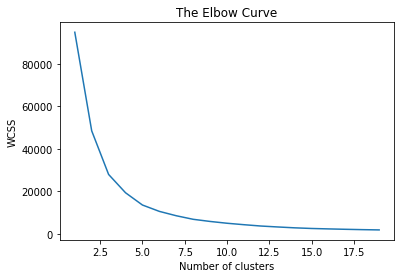

In [ ]:
wcss = []
for i in range(1,20):
 kmeans = cluster.KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pca_result)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Intertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K means clustering

In [ ]:
Kmeans = cluster.KMeans(n_clusters=6,init='k-means++',max_iter=500,verbose=True,random_state=0)
clustered = Kmeans.fit_predict(pca_result)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 11485.532849660876
start iteration
done sorting
end inner loop
Iteration 1, inertia 10843.166027610858
start iteration
done sorting
end inner loop
Iteration 2, inertia 10699.846797836452
start iteration
done sorting
end inner loop
Iteration 3, inertia 10645.433544116535
start iteration
done sorting
end inner loop
Iteration 4, inertia 10617.426306687876
start iteration
done sorting
end inner loop
Iteration 5, inertia 10603.122462604499
start iteration
done sorting
end inner loop
Iteration 6, inertia 10590.485903706647
start iteration
done sorting
end inner loop
Iteration 7, inertia 10580.890823681242
start iteration
done sorting
end inner loop
Iteration 8, inertia 10575.391574937983
start iteration
done sorting
end inner loop
Iteration 9, inertia 10572.600368298348
start iteration
done sorting
end inner loop
Iteration 10, inertia 10569.506146486026
start iteration
done sorting
end inner loop
Iterati

creating dataframe with predicted clusters

In [ ]:
dataset_predict = dataset_copy.copy()
dataset_predict['Prediction'] = clustered

plotting scatterplot for demonstrating K-Means clustering

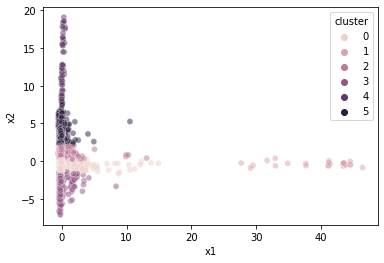

In [ ]:
PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']
k_means_figure = sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)

creating a dataframe with number of articles under each cluster

In [ ]:
news_classification = dataset_predict.groupby(['Source_code','Prediction'],as_index=False).count()
news_classification = news_classification.rename(columns={'Headlines' : 'Article_Count'})
news_classification = news_classification.drop(columns='Sources')

percentage of articles under each cluster for each source

In [ ]:
percentage = []
for source in list(news_articles_count['Source_code']):
    for row in list(news_classification['Article_Count'][news_classification['Source_code']==source]):
        percent = (row/int(news_articles_count['Article_Count'][news_articles_count['Source_code']==source]))*100
        percentage.append(percent)
news_classification['Percentage'] = percentage
dataset_predict['corpus'] = corpus

creating list of words used in each cluster

In [ ]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
for i in range(0,len(dataset_predict)):
    corpora = dataset_predict['corpus'][i].split()
    if dataset_predict['Prediction'][i] == 0:
        for x in corpora:
            cluster_0.append(x)
    elif dataset_predict['Prediction'][i] == 1:
        for x in corpora:
            cluster_1.append(x)
    elif dataset_predict['Prediction'][i] == 2:
        for x in corpora:
            cluster_2.append(x)
    elif dataset_predict['Prediction'][i] == 3:
        for x in corpora:
            cluster_3.append(x)
    elif dataset_predict['Prediction'][i] == 4:
        for x in corpora:
            cluster_4.append(x)
    elif dataset_predict['Prediction'][i] == 5:
        for x in corpora:
            cluster_5.append(x)
    elif dataset_predict['Prediction'][i] == 6:
        for x in corpora:
            cluster_6.append(x)
cluster_0 = list(dict.fromkeys(cluster_0))
cluster_1 = list(dict.fromkeys(cluster_1))
cluster_2 = list(dict.fromkeys(cluster_2))
cluster_3 = list(dict.fromkeys(cluster_3))
cluster_4 = list(dict.fromkeys(cluster_4))
cluster_5 = list(dict.fromkeys(cluster_5))
cluster_6 = list(dict.fromkeys(cluster_6))

saving the scatterplot

In [ ]:
figure = k_means_figure.get_figure()
figure.savefig('K_Means_Classification_fig2')

saving the model

In [ ]:
Kmeans = Kmeans.fit(pca_result)
filename = 'news_classifier_KMeans2.sav'
pickle.dump(Kmeans, open(filename, 'wb'))

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 11485.532849660876
start iteration
done sorting
end inner loop
Iteration 1, inertia 10843.166027610858
start iteration
done sorting
end inner loop
Iteration 2, inertia 10699.846797836452
start iteration
done sorting
end inner loop
Iteration 3, inertia 10645.433544116535
start iteration
done sorting
end inner loop
Iteration 4, inertia 10617.426306687876
start iteration
done sorting
end inner loop
Iteration 5, inertia 10603.122462604499
start iteration
done sorting
end inner loop
Iteration 6, inertia 10590.485903706647
start iteration
done sorting
end inner loop
Iteration 7, inertia 10580.890823681242
start iteration
done sorting
end inner loop
Iteration 8, inertia 10575.391574937983
start iteration
done sorting
end inner loop
Iteration 9, inertia 10572.600368298348
start iteration
done sorting
end inner loop
Iteration 10, inertia 10569.506146486026
start iteration
done sorting
end inner loop
Iterati